<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [18]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-18 14:34:03--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-18 14:34:03 (22.3 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [19]:
# load in the data
data = pd.read_csv('moore.csv', header = None).values

In [20]:
data.shape

(162, 2)

In [21]:
X = data[:,0].reshape(-1,1)

In [22]:
X.shape

(162, 1)

In [23]:
Y = data[:,1]

In [24]:
Y.shape

(162,)

In [25]:
Y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

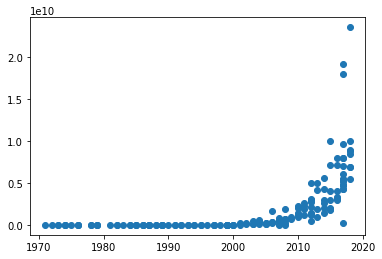

In [26]:
plt.scatter(X, Y)

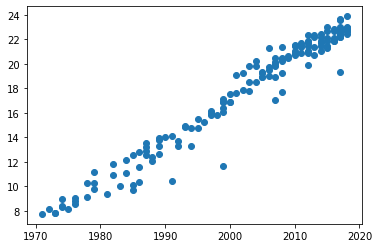

In [27]:
Y = np.log(Y)
plt.scatter(X, Y)

In [28]:
# centre the data
X = X - X.mean()

In [29]:
# create tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [30]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks =[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 584.0789
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 471.3683
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 415.8063
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 257.9141
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 210.8730
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 189.9148
Epoch 7/200
6/6 [==============================] - 0s 971us/step - loss: 181.8241
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 115.8359
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 114.5028
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 36.1807
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 27.4022
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 24.4040
Epoch 13/200
6/6 [====================

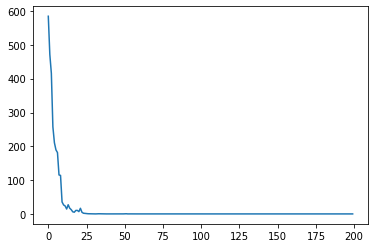

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label = 'loss')

In [32]:
# get the slope of the line
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3490334]], dtype=float32), array([17.756674], dtype=float32)]


In [33]:
# The slope of the line is
a = model.layers[0].get_weights()[0][0,0]

In [34]:
a

0.3490334

In [36]:
print("Time it takes to double:", np.log(2) / a)

Time it takes to double: 1.9859051005587363


In [37]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
